# Exploring DyNetX
DyNetx - Dynamic Network library

http://dynetx.readthedocs.io/en/latest/index.html

In [1]:
import numpy as np
import networkx as nx
import dynetx as dn

Note: DyNetX required NetworkX 2.1 and Numpy 1.14.x (which meant updating a lot of other packages in my Python and Jupyter Notebook environment)

In [4]:
np.version.full_version

'1.14.2'

Create a **dynamic graph**, and add a few vertices.

In [5]:
# A DynGraph stores nodes and timestamped interaction.
G = dn.DynGraph()

In [6]:
G.add_node(1)

In [7]:
G.add_nodes_from([2,3,4])

In [8]:
G.number_of_nodes()

4

In [9]:
G.nodes()

[1, 2, 3, 4]

We add **interactions** to a dynamic graph. An interaction is an edge between two vertices, and they are added at a specific time (here the timestamp is `t=0`)

In [10]:
time = 0
G.add_interactions_from([(1, 2), (1, 3), (2, 3), (3, 4)], t=time)

In [11]:
time = 1
G.add_interactions_from([(1, 4)], t=time)

add an interaction with a vanishing point

In [21]:
time = 1
vanish = 2
G.add_interactions_from([(1, 5)], t=time, e=vanish)

and we can see all interactions

In [26]:
G.interactions()

[(1, 2, {'t': [[0, 0]]}),
 (1, 3, {'t': [[0, 0]]}),
 (1, 4, {'t': [[1, 1]]}),
 (1, 5, {'t': [[1, 1]]}),
 (2, 3, {'t': [[0, 0]]}),
 (3, 4, {'t': [[0, 0]]})]

and we can see interactions for specific times

In [27]:
G.interactions(t=0)

[(1, 2, {'t': [0]}),
 (1, 3, {'t': [0]}),
 (2, 3, {'t': [0]}),
 (3, 4, {'t': [0]})]

In [28]:
G.interactions(t=1)

[(1, 4, {'t': [1]}), (1, 5, {'t': [1]})]

In [29]:
G.interactions(t=2)

[]

we can "stream" the interactions, note they are time ordered.

The values are:
- source
- target
- interaciton
- time

Where interaction is:
- `+` means add
- `-` means remove ("vanish")

In [30]:
for i in G.stream_interactions():
    print(i)

(1, 2, '+', 0)
(1, 3, '+', 0)
(2, 3, '+', 0)
(3, 4, '+', 0)
(1, 4, '+', 1)
(1, 5, '+', 1)
(1, 5, '-', 2)


how to build own own representation

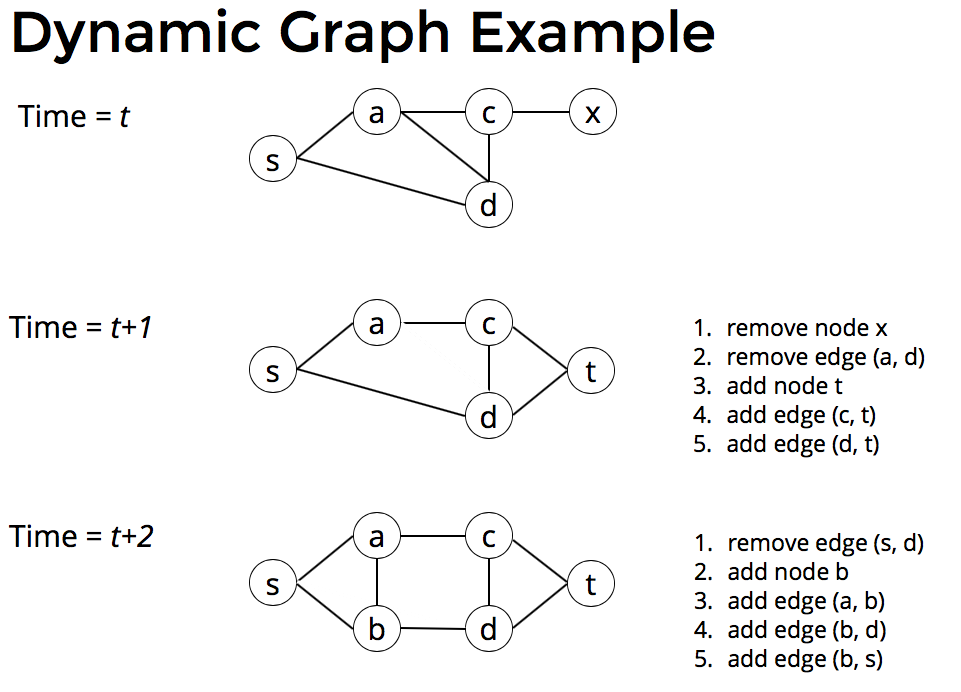

In [66]:
from IPython.display import Image
Image(filename='dynamic-graph-example.png')

In [67]:
# Specify the node-to-node interactions over a span of time
# (u, v) : [(t, e), (t, e)]
# The nodes are: u, v
# The time span is 
#   t: appearance snapshot id
#.  e: vanishing snapshot id
form2 = {
    ('a','b'): [(2, -1)],
    ('a','c'): [(0, -1)],
    ('a','d'): [(0, 1)],
    ('a','s'): [(0, -1)],
    ('b','d'): [(2, -1)],
    ('b','s'): [(2, -1)],
    ('c','d'): [(0, -1)],
    ('c','t'): [(1, -1)],
    ('c','x'): [(0, 1)],
    ('d','s'): [(0, 2)],
    ('d','t'): [(1, -1)]
}

In [68]:
G = dn.DynGraph()

In [69]:
for link in form2:
    u = link[0]
    v = link[1]
    for interaction in form2[link]:
        t = interaction[0]
        e = interaction[1]
        if e == -1:
            G.add_interaction(u, v, t)
        else:
            G.add_interaction(u, v, t, e)

In [70]:
G.interactions()

[('a', 'b', {'t': [[2, 2]]}),
 ('a', 'c', {'t': [[0, 0]]}),
 ('a', 'd', {'t': [[0, 0]]}),
 ('a', 's', {'t': [[0, 0]]}),
 ('b', 'd', {'t': [[2, 2]]}),
 ('b', 's', {'t': [[2, 2]]}),
 ('c', 'd', {'t': [[0, 0]]}),
 ('c', 't', {'t': [[1, 1]]}),
 ('c', 'x', {'t': [[0, 0]]}),
 ('d', 's', {'t': [[0, 1]]}),
 ('d', 't', {'t': [[1, 1]]})]

In [71]:
for i in G.stream_interactions():
    print(i)

('a', 'c', '+', 0)
('a', 'd', '+', 0)
('a', 's', '+', 0)
('c', 'd', '+', 0)
('c', 'x', '+', 0)
('d', 's', '+', 0)
('a', 'd', '-', 1)
('c', 't', '+', 1)
('c', 'x', '-', 1)
('d', 't', '+', 1)
('a', 'b', '+', 2)
('b', 'd', '+', 2)
('b', 's', '+', 2)
('d', 's', '-', 2)


Some thoughts and comments on DyNetX:
- it is derived from NetworkX
- it has a nice concept of time
- can read/write dynamic graphs and snapshots from/to files
- can see the state of a dynamic graph at given point in time (`time_slice`)
- dynamic graph activity can be frozen
- can add cycles
- can add stars
- can add paths
- it does not allow for removing nodes